# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

# Data Exploration

In [2]:
# check to see if there is any null values
data.isnull()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False


In [3]:
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

In [4]:
# there is no missing values

In [5]:
features = data.columns
features

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit'],
      dtype='object')

In [6]:
data[features].describe()

# From the output, there is 414 inputs in the table. We can se the mean for price_per_unit is around 37. However, there is significant 
# deviation which indicates there is a lot of variance in terms of price_per_unit

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


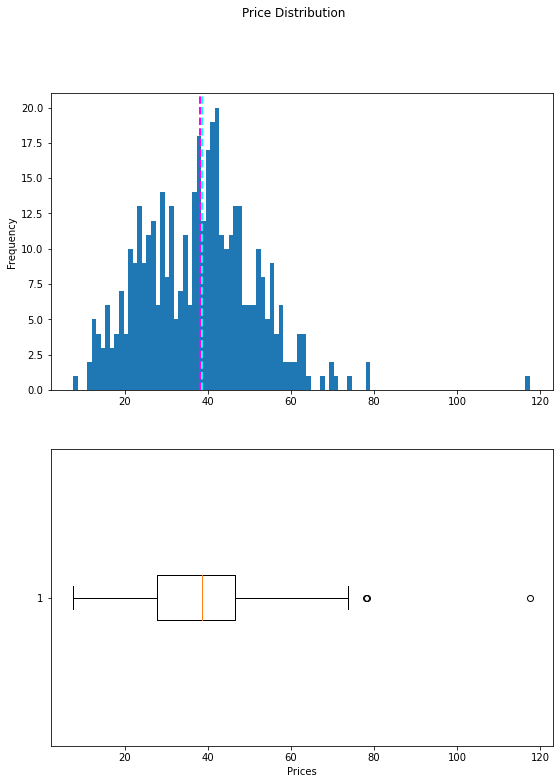

In [7]:
# let's look into price distribution

import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = data['price_per_unit']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Prices')

# Add a title to the Figure
fig.suptitle('Price Distribution')

# Show the figure
fig.show()

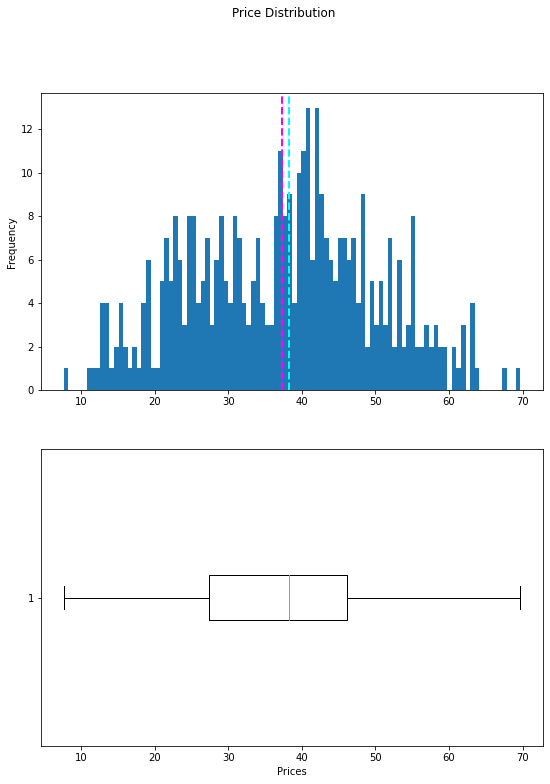

In [8]:
# Remove Outliers
data = data[data['price_per_unit'] < 70]
# Get the label column
label = data['price_per_unit']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Prices')

# Add a title to the Figure
fig.suptitle('Price Distribution')

# Show the figure
fig.show()

In [9]:
# In the above figure we can see that there's not much outliers; only two

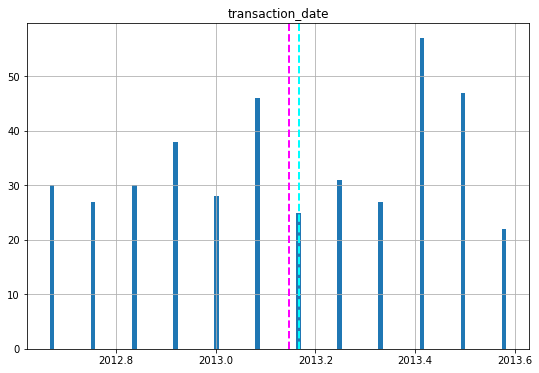

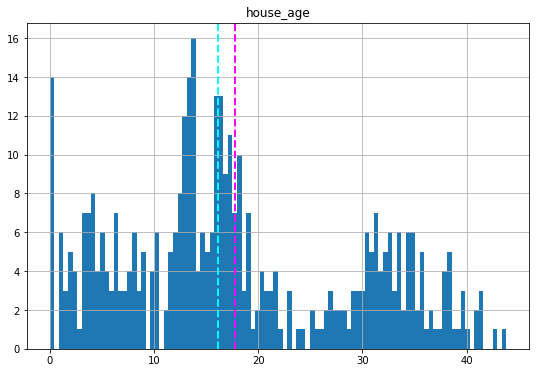

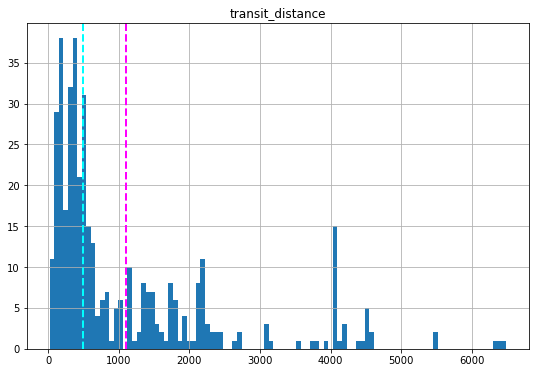

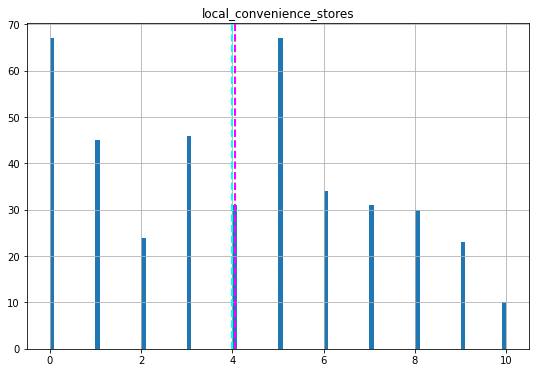

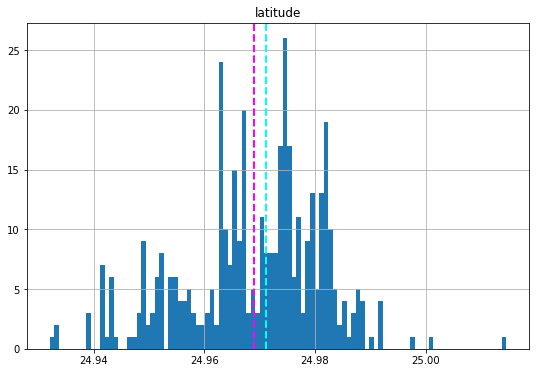

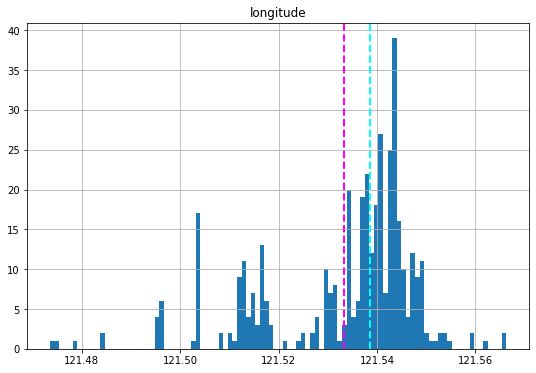

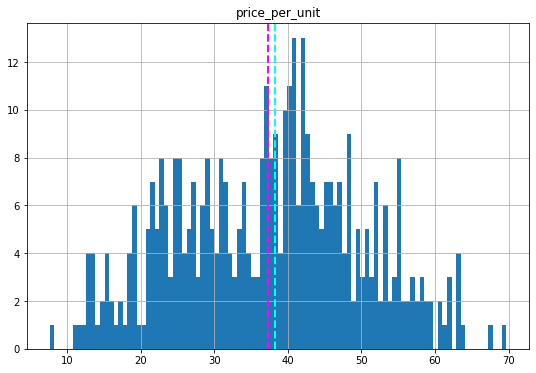

In [10]:
# Plot a histogram for each numeric feature
for col in features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

# Correlation between features and Labels

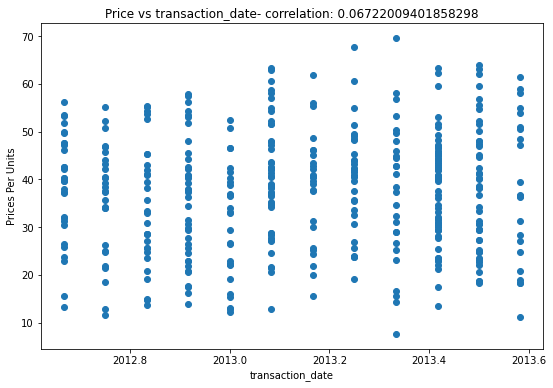

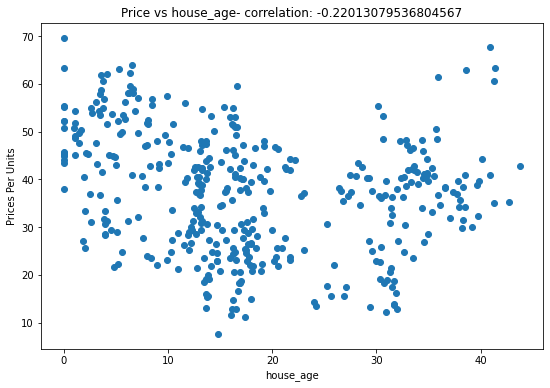

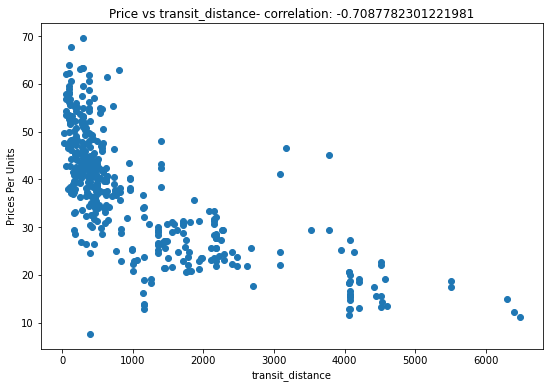

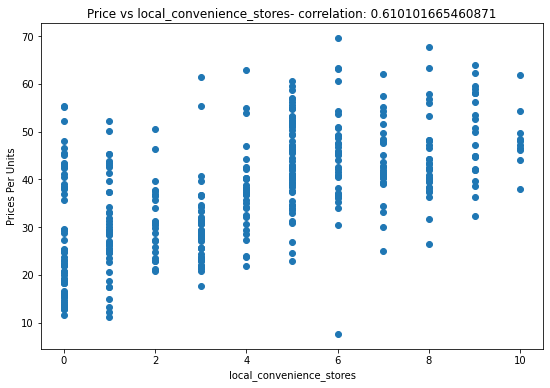

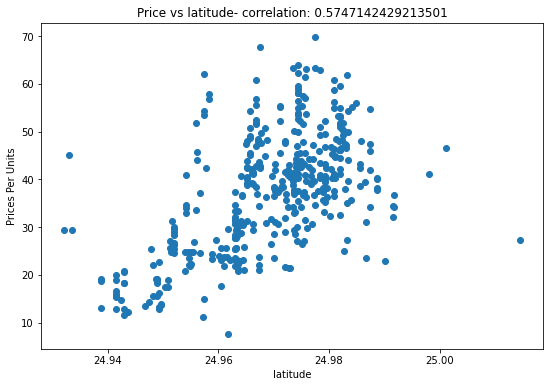

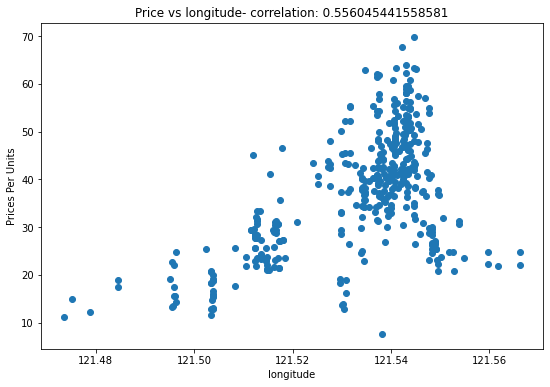

In [11]:
for col in features[:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Prices Per Units')
    ax.set_title('Price vs ' + col + '- correlation: ' + str(correlation))
plt.show()

# Normalizations

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(data)
data_scaled

array([[0.27292576, 0.73059361, 0.00951267, ..., 0.61694135, 0.71932284,
        0.48792271],
       [0.27292576, 0.44520548, 0.04380939, ..., 0.5849491 , 0.71145137,
        0.55716586],
       [1.        , 0.30365297, 0.08331505, ..., 0.67123122, 0.75889584,
        0.63929147],
       ...,
       [0.63646288, 0.42922374, 0.05686115, ..., 0.57149782, 0.71522536,
        0.53140097],
       [0.36353712, 0.18493151, 0.0125958 , ..., 0.42014057, 0.72395946,
        0.72302738],
       [0.90938865, 0.14840183, 0.0103754 , ..., 0.51211827, 0.75016174,
        0.90660225]])

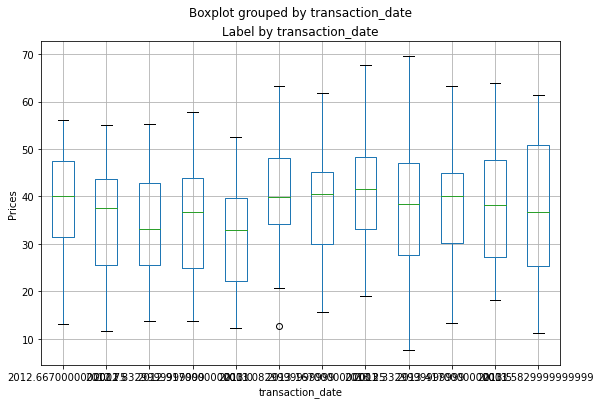

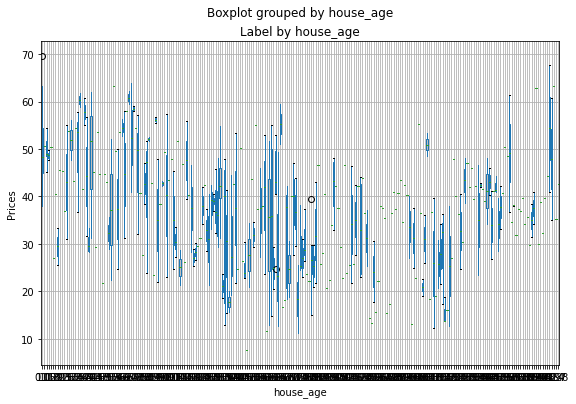

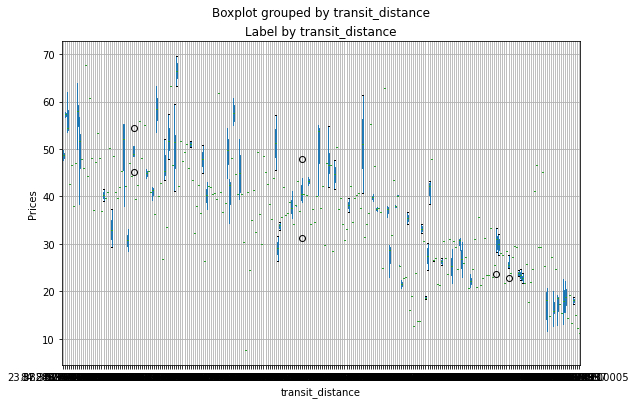

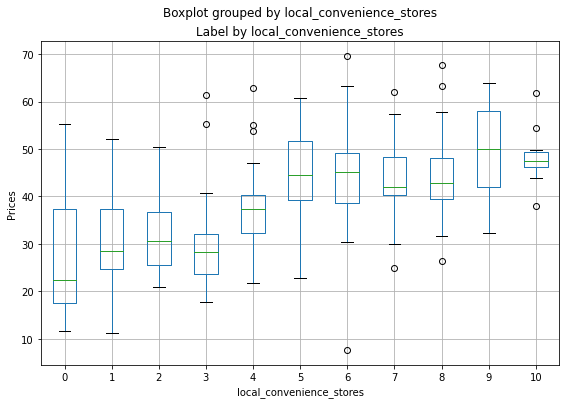

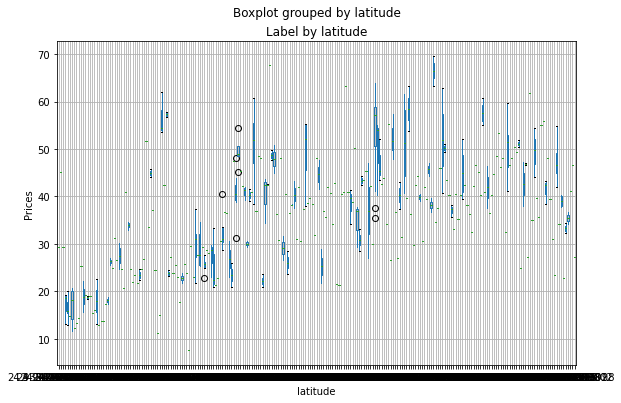

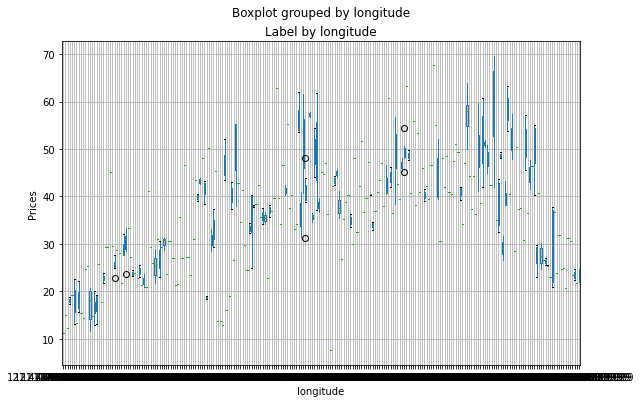

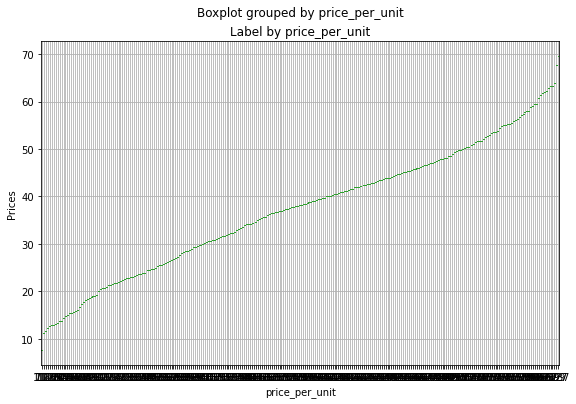

In [13]:
# plot a boxplot for the label by each categorical feature
for col in features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Prices")
plt.show()

In [14]:
# Separate features and labels
X, y = data[['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude']].values, data['price_per_unit'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[2.0129170e+03 3.2000000e+01 8.4878820e+01 1.0000000e+01 2.4982980e+01
  1.2154024e+02]
 [2.0129170e+03 1.9500000e+01 3.0659470e+02 9.0000000e+00 2.4980340e+01
  1.2153951e+02]
 [2.0135830e+03 1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01
  1.2154391e+02]
 [2.0135000e+03 1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01
  1.2154391e+02]
 [2.0128330e+03 5.0000000e+00 3.9056840e+02 5.0000000e+00 2.4979370e+01
  1.2154245e+02]
 [2.0126670e+03 7.1000000e+00 2.1750300e+03 3.0000000e+00 2.4963050e+01
  1.2151254e+02]
 [2.0126670e+03 3.4500000e+01 6.2347310e+02 7.0000000e+00 2.4979330e+01
  1.2153642e+02]
 [2.0134170e+03 2.0300000e+01 2.8760250e+02 6.0000000e+00 2.4980420e+01
  1.2154228e+02]
 [2.0135000e+03 3.1700000e+01 5.5120380e+03 1.0000000e+00 2.4950950e+01
  1.2148458e+02]
 [2.0134170e+03 1.7900000e+01 1.7831800e+03 3.0000000e+00 2.4967310e+01
  1.2151486e+02]]

Labels:
[37.9 42.2 47.3 54.8 43.1 32.1 40.3 46.7 18.8 22.1]


In [15]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 285 rows
Test Set: 123 rows


In [16]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [17]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [45. 32. 45. 53. 43. 38. 43. 22. 50. 36.]
Actual labels   :  [40.8 38.4 55.  44.9 45.7 28.5 39.3 24.7 63.2 40.6]


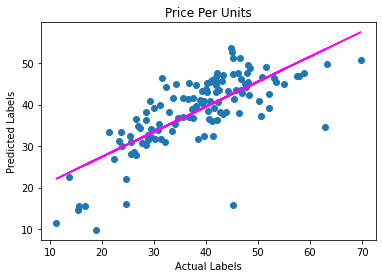

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price Per Units')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 40.1883830523336
RMSE: 6.3394308145395515
R2: 0.6570707121373265


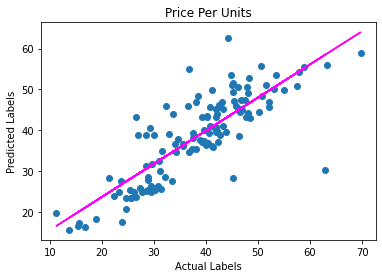

In [19]:
# Train the model

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price Per Units')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [20]:
import joblib

# Save the model as a pickle file
filename = 'price_per_unit.pkl'
joblib.dump(model, filename)

['price_per_unit.pkl']

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [21]:
# Your code to use the trained model
# Load the model from the file
loaded_model = joblib.load(filename)

In [22]:
# An array of features based on five-day weather forecast
X_new = np.array([[2013.167, 16.2, 289.3248, 5, 24.98203, 121.54348],
                  [2013.000, 13.6, 4082.015, 0, 24.94155, 121.50381],])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('Price per unit predictions:')
for prediction in results:
    print(np.round(prediction))

Price per unit predictions:
50.0
17.0
